In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import StandardScaler

In [45]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [47]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [48]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


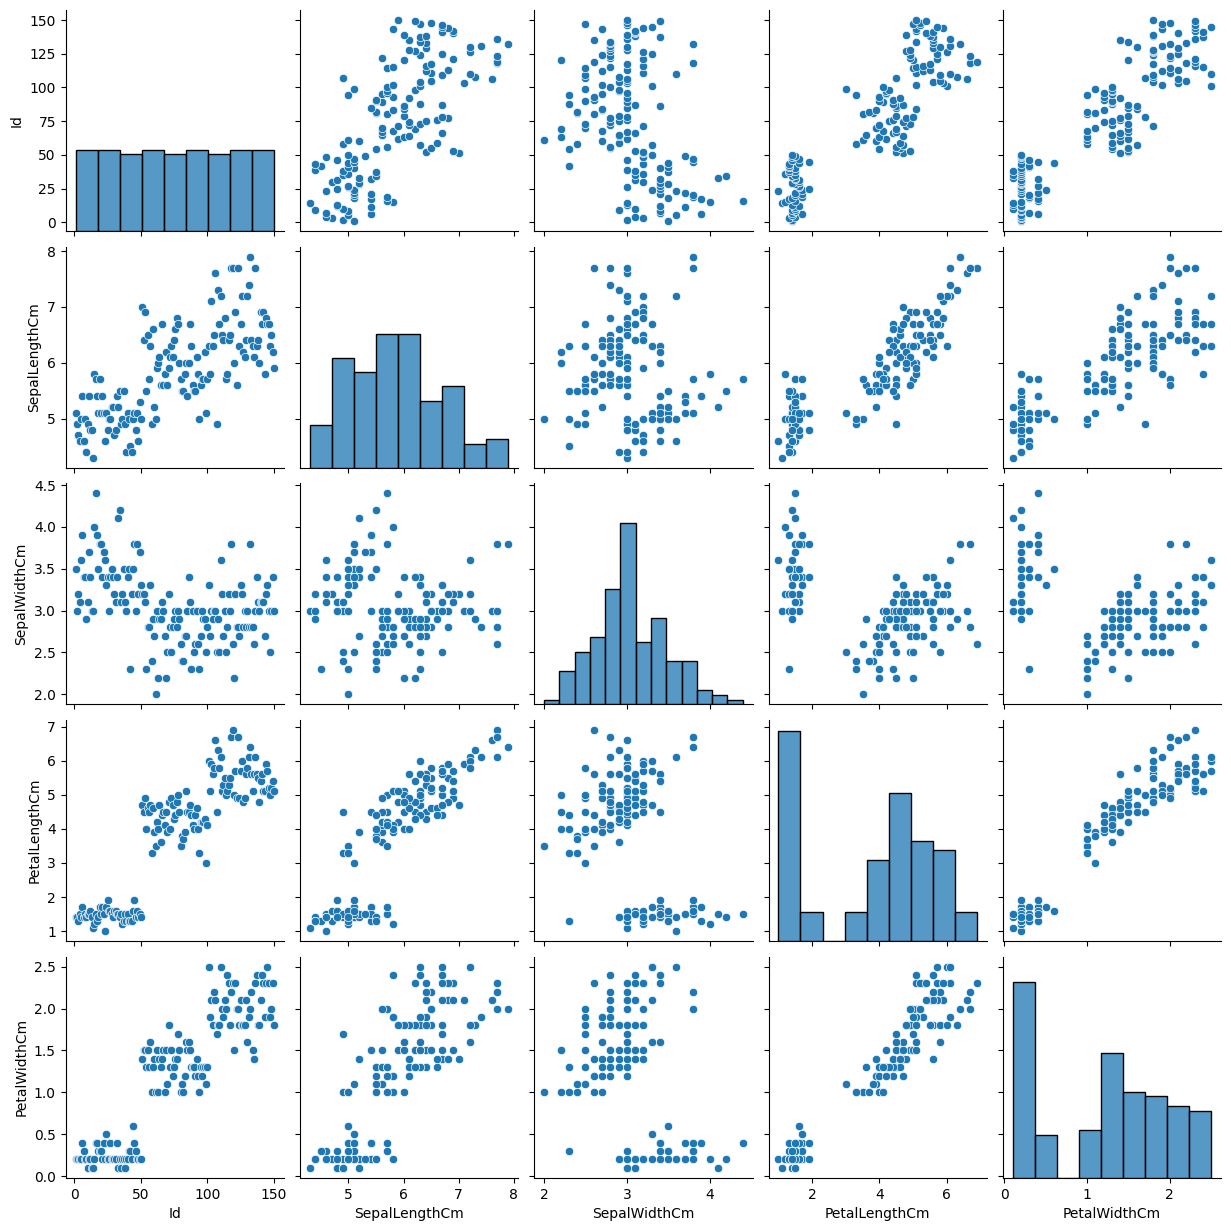

In [49]:
sns.pairplot(df)
plt.show()

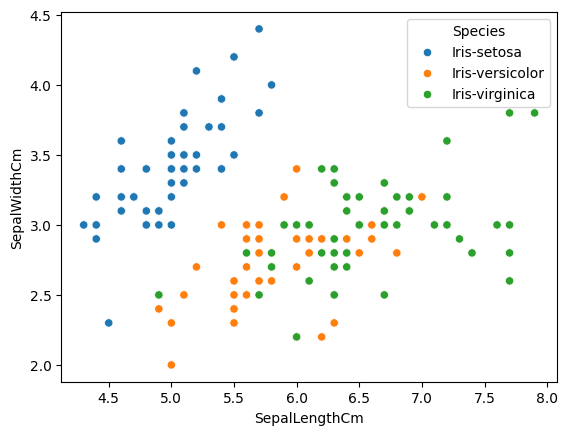

In [50]:
sns.scatterplot(x=df["SepalLengthCm"], y=df["SepalWidthCm"], hue=df["Species"])
plt.show()

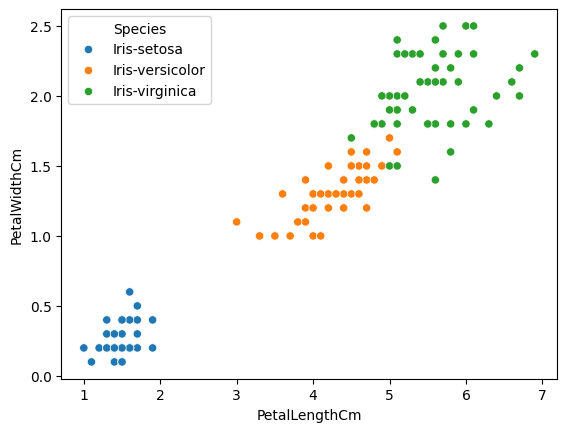

In [51]:
sns.scatterplot(x=df["PetalLengthCm"], y=df["PetalWidthCm"], hue=df["Species"])
plt.show()

In [52]:
df = df.drop("Id",axis=1)

In [53]:
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])

In [54]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [56]:
df["Species"].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [57]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [59]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
gnb = GaussianNB()

In [61]:
gnb.fit(X_train_scaled, y_train)
y_pred = gnb.predict(X_test_scaled)

In [62]:
print("confisuon matrix: \n", confusion_matrix(y_pred, y_test))
print("accuracy score: \n", accuracy_score(y_pred, y_test))
print("classification report: \n", classification_report(y_pred, y_test))

confisuon matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
accuracy score: 
 1.0
classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



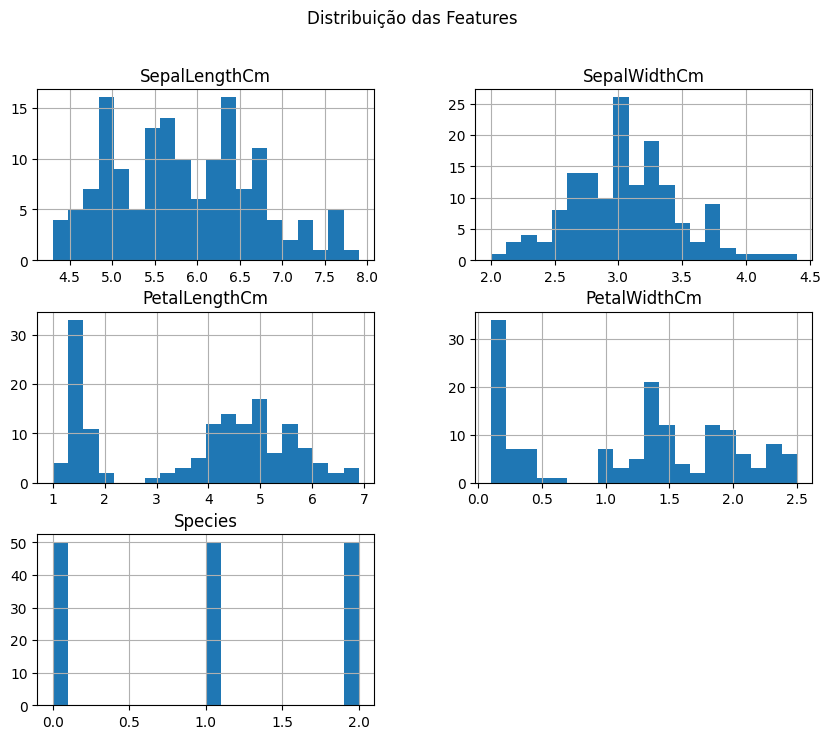

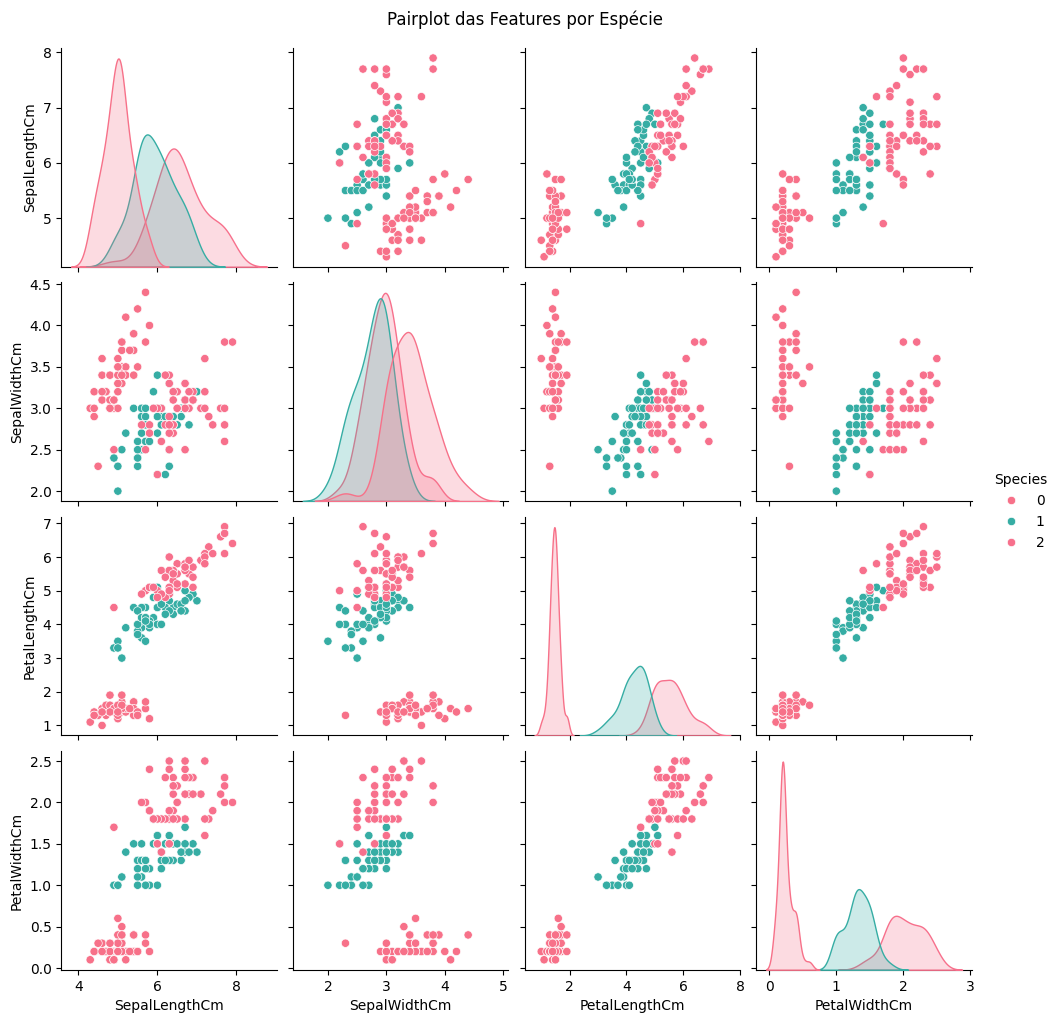

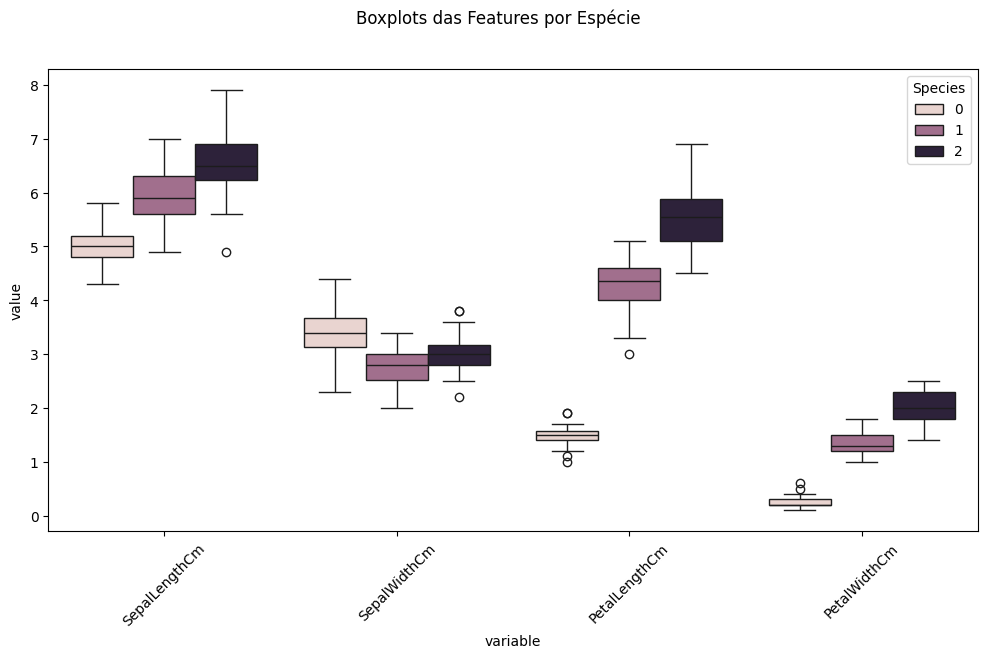

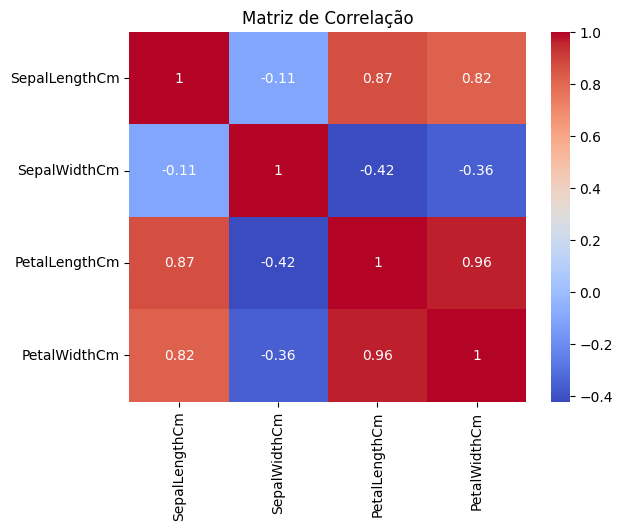

In [63]:
# Histogramas para distribuição de features
df.hist(figsize=(10, 8), bins=20)
plt.suptitle('Distribuição das Features')
plt.show()

# Pairplot para relações entre features, colorido por espécie
sns.pairplot(df, hue='Species', palette='husl')
plt.suptitle('Pairplot das Features por Espécie', y=1.02)
plt.show()

# Boxplots para outliers e distribuição por espécie
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.melt(id_vars='Species'), x='variable', y='value', hue='Species')
plt.suptitle('Boxplots das Features por Espécie')
plt.xticks(rotation=45)
plt.show()

# Matriz de correlação (sem a coluna Id, já dropada)
corr = df.drop('Species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [64]:
# Verificar valores nulos ou duplicados
print("Valores nulos:", df.isnull().sum().sum())
print("Duplicados:", df.duplicated().sum())

Valores nulos: 0
Duplicados: 3


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [66]:
# Definir modelos e hiperparâmetros para GridSearch
models = {
    'Logistic Regression': (LogisticRegression(max_iter=200), {'C': [0.1, 1, 10]}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 3, 5, 7]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 200]}),
    'Naive Bayes': (GaussianNB(), {})  # Sem hiperparâmetros para tunar aqui
}

# Treinar e avaliar cada modelo
results = []
for name, (model, params) in models.items():
    if params:  # Usar GridSearch se houver params
        grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
        grid.fit(X_train_scaled, y_train)
        best_model = grid.best_estimator_
        print(f"Melhores params para {name}: {grid.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train_scaled, y_train)
    
    # Predições e métricas no teste
    y_pred = best_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    conf = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Cross-validation (média de accuracy em 5 folds)
    cv_scores = cross_val_score(best_model, scaler.transform(X), y, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    
    results.append({
        'Modelo': name,
        'Accuracy (Teste)': acc,
        'CV Accuracy (Média)': cv_mean,
        'Precision (Média)': report['weighted avg']['precision'],
        'Recall (Média)': report['weighted avg']['recall'],
        'F1-Score (Média)': report['weighted avg']['f1-score']
    })
    
    print(f"\n--- {name} ---\nConfusion Matrix:\n{conf}\nClassification Report:\n{classification_report(y_test, y_pred)}")

# Mostrar comparação em tabela
results_df = pd.DataFrame(results)
print("\nComparação de Modelos:")
print(results_df.sort_values(by='CV Accuracy (Média)', ascending=False))

Melhores params para Logistic Regression: {'C': 10}

--- Logistic Regression ---
Confusion Matrix:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Melhores params para KNN: {'n_neighbors': 7}

--- KNN ---
Confusion Matrix:
[[12  0  0]
 [ 0 13  1]
 [ 0  0 12]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        3

Importância das Features:
         Feature  Importance
3   PetalWidthCm    0.495195
2  PetalLengthCm    0.358182
0  SepalLengthCm    0.123608
1   SepalWidthCm    0.023016


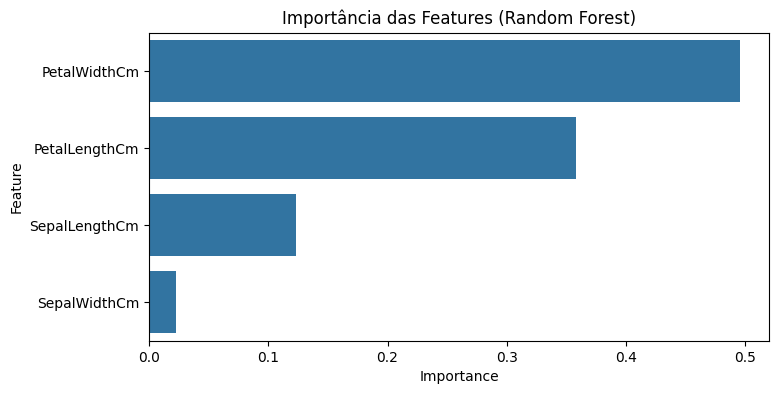

In [67]:
# Assumindo Random Forest como melhor (ajuste conforme resultados)
best_model = models['Random Forest'][0]  # Pegue o treinado
best_model.fit(X_train_scaled, y_train)  # Re-treinar se necessário

# Importância das features
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Importância das Features:")
print(importances)

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importances)
plt.title('Importância das Features (Random Forest)')
plt.show()

In [68]:
import joblib

# Salvar o modelo e scaler
joblib.dump(gnb, 'iris_model.pkl')  # Ou use o best_model de cima
joblib.dump(scaler, 'scaler.pkl')
print("Modelo e scaler salvos!")

Modelo e scaler salvos!


In [69]:
# Carregar modelo e scaler (se necessário)
loaded_model = joblib.load('iris_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Exemplo de nova flor: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]
new_flower = [[5.9, 3.0, 5.1, 1.8]]  # Deveria ser Iris-virginica (classe 2)

# Pré-processar e prever
new_scaled = loaded_scaler.transform(new_flower)
prediction = loaded_model.predict(new_scaled)[0]

# Mapear de volta para nome da espécie
species_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
print(f"Predição para a nova flor: {species_map[prediction]}")

Predição para a nova flor: Iris-virginica


c:\Users\4539\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
